In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import random
warnings.filterwarnings(action='ignore')

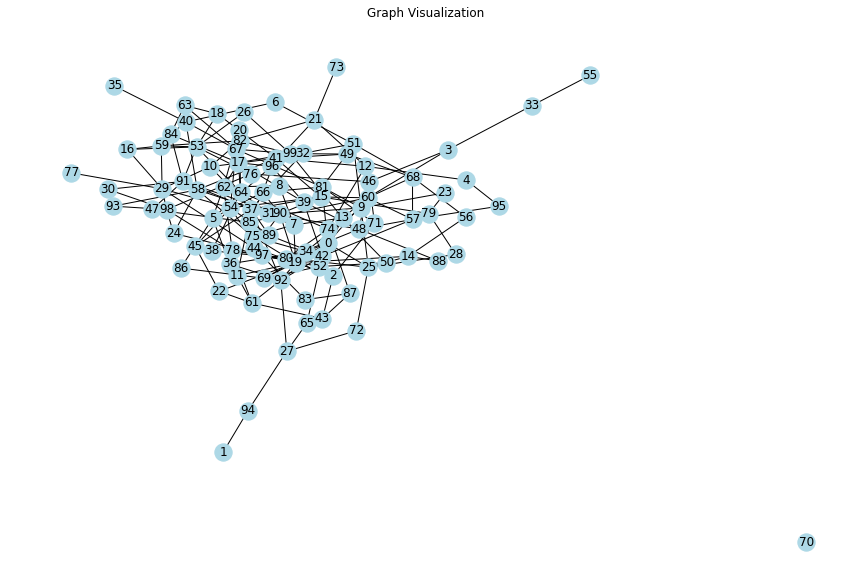

In [2]:
graph = nx.generators.random_graphs.gnm_random_graph(n=100, m=200)

plt.figure(figsize=(15, 10))
plt.title('Graph Visualization')
nx.draw(graph, node_color='lightblue', with_labels=True)
plt.savefig('graph_1.png', dpi=300)

In [3]:
adjacency_matrix = nx.to_numpy_matrix(graph)
adjacency_matrix[:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [4]:
adjacency_list=nx.convert.to_dict_of_lists(graph)
keys_for_slicing = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sliced_list = {key: adjacency_list[key] for key in keys_for_slicing}
sliced_list

{0: [34, 60, 92, 25, 81, 69],
 1: [94],
 2: [71, 19, 44, 43],
 3: [60, 46, 33],
 4: [12, 95],
 5: [36, 66, 62, 96, 86],
 6: [40, 51],
 7: [8, 19, 75, 13, 37, 90],
 8: [7, 62],
 9: [51, 90, 23, 81, 34, 25]}

In [5]:
depth_first = list(nx.dfs_preorder_nodes(G=graph,source=0))
print(depth_first)

[0, 34, 36, 5, 66, 81, 49, 99, 32, 96, 39, 17, 62, 78, 98, 76, 46, 48, 31, 64, 82, 10, 41, 58, 93, 24, 97, 25, 72, 27, 94, 1, 92, 42, 75, 7, 8, 19, 2, 71, 44, 83, 87, 43, 61, 22, 45, 54, 89, 37, 15, 79, 23, 9, 51, 6, 40, 35, 84, 91, 47, 85, 60, 57, 68, 56, 14, 88, 95, 4, 12, 21, 73, 74, 80, 38, 3, 33, 55, 13, 50, 52, 69, 86, 11, 53, 59, 29, 16, 77, 26, 18, 63, 67, 90, 30, 28, 65, 20]


In [6]:
conn_comp = list(nx.connected_components(graph))
print('Total number of connected components =', len(conn_comp), '\n')
for i in range(len(conn_comp)):
    print("Component №", i+1)
    iterator = iter(conn_comp[i])
    item = next(iterator, None)
    print(list(nx.dfs_preorder_nodes(graph, source=item)))

Total number of connected components = 2 

Component № 1
[0, 34, 36, 5, 66, 81, 49, 99, 32, 96, 39, 17, 62, 78, 98, 76, 46, 48, 31, 64, 82, 10, 41, 58, 93, 24, 97, 25, 72, 27, 94, 1, 92, 42, 75, 7, 8, 19, 2, 71, 44, 83, 87, 43, 61, 22, 45, 54, 89, 37, 15, 79, 23, 9, 51, 6, 40, 35, 84, 91, 47, 85, 60, 57, 68, 56, 14, 88, 95, 4, 12, 21, 73, 74, 80, 38, 3, 33, 55, 13, 50, 52, 69, 86, 11, 53, 59, 29, 16, 77, 26, 18, 63, 67, 90, 30, 28, 65, 20]
Component № 2
[70]


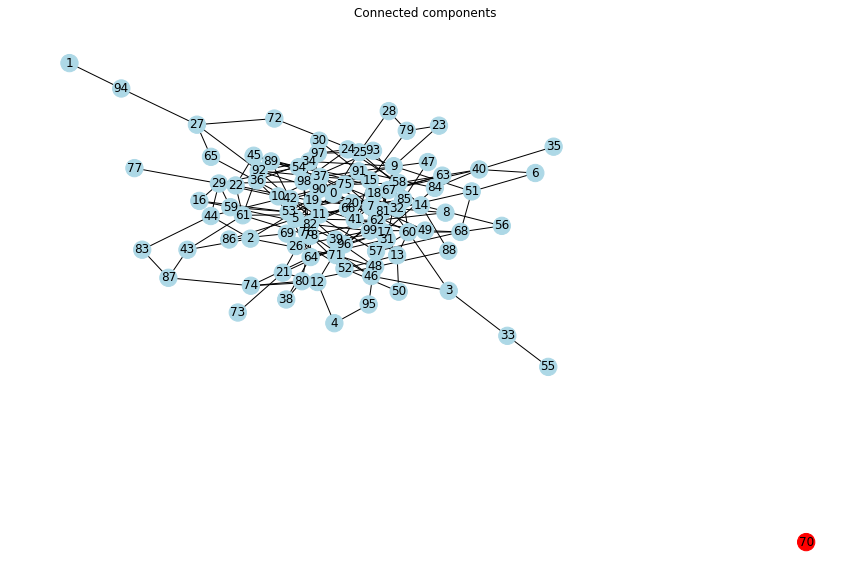

In [7]:
color_map = []
for node in graph:
    if node in list(nx.dfs_preorder_nodes(graph, source=1)):
        color_map.append('lightblue')
    else: 
        color_map.append('red') 
        
plt.figure(figsize=(15, 10))
plt.title('Connected components')
nx.draw(graph, with_labels=True, node_color=color_map)
plt.savefig('graph_2.png', dpi=300)

In [11]:
start, target = random.randint(0, 99), random.randint(0, 99)

shortest_path = list(nx.bidirectional_shortest_path(G=graph, source=start, target=target))
print('Shortest path between nodes', start, 'and', target, shortest_path)

Shortest path between nodes 20 and 4 [20, 82, 21, 12, 4]


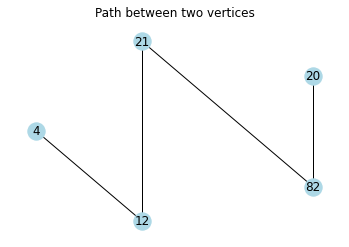

In [12]:
plt.title('Path between two vertices')
nx.draw_shell(graph.subgraph(shortest_path), node_color='lightblue', with_labels=True)
plt.savefig('graph_3.png', dpi=300)